# Simple Model
The aim of this workbook it to take an extremely simplified version of the model (just debris) and then build the equations and solve for them to ensure that the model is working correctly before implementing.

In [1]:
import dill as pickle
import sympy as sp
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import jit, prange

In [2]:
with open(r'D:\ucl\pyssem\scenario_properties_short.pkl', 'rb') as f:
    scenario_properties = pickle.load(f)

In [63]:
# Lambdafiying the equations
symbols = scenario_properties.all_symbolic_vars

# Convert to symbols
print(len(symbols)) # Should be 320 for a 40, 8 matrix
print(symbols)

# Convert equations to lambda functions
#equations = [sp.lambdify(symbols, eq, 'numpy') for eq in scenario_properties.equations]
full_drag = [sp.lambdify(symbols, eq, 'numpy') for eq in scenario_properties.full_drag]

320
[Su_260kg_1, Su_260kg_2, Su_260kg_3, Su_260kg_4, Su_260kg_5, Su_260kg_6, Su_260kg_7, Su_260kg_8, Su_260kg_9, Su_260kg_10, Su_260kg_11, Su_260kg_12, Su_260kg_13, Su_260kg_14, Su_260kg_15, Su_260kg_16, Su_260kg_17, Su_260kg_18, Su_260kg_19, Su_260kg_20, Su_260kg_21, Su_260kg_22, Su_260kg_23, Su_260kg_24, Su_260kg_25, Su_260kg_26, Su_260kg_27, Su_260kg_28, Su_260kg_29, Su_260kg_30, Su_260kg_31, Su_260kg_32, Su_260kg_33, Su_260kg_34, Su_260kg_35, Su_260kg_36, Su_260kg_37, Su_260kg_38, Su_260kg_39, Su_260kg_40, Su_473kg_1, Su_473kg_2, Su_473kg_3, Su_473kg_4, Su_473kg_5, Su_473kg_6, Su_473kg_7, Su_473kg_8, Su_473kg_9, Su_473kg_10, Su_473kg_11, Su_473kg_12, Su_473kg_13, Su_473kg_14, Su_473kg_15, Su_473kg_16, Su_473kg_17, Su_473kg_18, Su_473kg_19, Su_473kg_20, Su_473kg_21, Su_473kg_22, Su_473kg_23, Su_473kg_24, Su_473kg_25, Su_473kg_26, Su_473kg_27, Su_473kg_28, Su_473kg_29, Su_473kg_30, Su_473kg_31, Su_473kg_32, Su_473kg_33, Su_473kg_34, Su_473kg_35, Su_473kg_36, Su_473kg_37, Su_473kg_38,

In [4]:
full_lambda_flattened = []

for i in range(len(scenario_properties.full_lambda)):
    if scenario_properties.full_lambda[i] is not None:
        full_lambda_flattened.extend(scenario_properties.full_lambda[i])
    else:
        # Append None to the list, length of scenario_properties.n_shells
        full_lambda_flattened.extend([None]*scenario_properties.n_shells)

In [53]:
x0_flattened

array([   2,    2,   11,   14,   30,   43,   44,  117,  161,  212,  265,
       1705,  186,   31,   20,    6,   21,    2,    3,    6,    1,    0,
         11,    7,   16,    4,    0,    1,    2,    5,    0,    8,   44,
        286,   28,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    2,    3,    4,   27,   27,    3,   12,   36,   28,
          4,   14,    3,    9,   75,   10,    0,    0,    3,    2,    3,
          0,    0,    1,   14,    0,    0,    0,    1,    0,    0,    0,
          2,    0,    0,    0,    1,    1,    1,   16,    9,   11,    7,
         17,   34,   39,   24,   60,   63,   93,   53,   74,   41,   66,
        154,   61,   70,   17,   44,   39,   63,  137,   14,   21,   29,
         11,    6,    6,   16,    6,    2,    3,   12,    3,   28,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    2,    0,    1,    3,    0,    1,    1,
          1,    0,    1,    1,    0,    0,    0,   

In [119]:
x0_flattened = scenario_properties.x0.T.values.flatten()
times = np.array(scenario_properties.scen_times)

# Initial population needs to be in one columnn, so now the intiial population is in one. Species 1 is the first 40 rows, species 2 is the next 40 rows, etc.
def population_shell(t, N, full_lambda, equations):
    # Initialize the rate of change array
    dN_dt = np.zeros_like(N)

    # Iterate over each component in N
    for i in range(len(N)):
       
        # Compute and add the external modification rate, if applicable
        # Now using np.interp to calculate the increase
        if full_lambda[i] is not None:
            increase = np.interp(t, times, full_lambda[i])
            dN_dt[i] += increase

         print(N[i], increase)
        # Compute the intrinsic rate of change from the differential equation
        dN_dt[i] = equations[i](*N)

    return dN_dt

output = solve_ivp(population_shell, [scenario_properties.scen_times[0], scenario_properties.scen_times[-1]], x0_flattened, args=(full_lambda_flattened, full_drag), 
                   t_eval=scenario_properties.scen_times, method='LSODA', step_size=1, max_step=1, rtol=1e-6, atol=1e-6)

d:\Programs\Anaconda\envs\fspsim\lib\site-packages\scipy\integrate\_ivp\common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `step_size`.
  warn("The following arguments have no effect for a chosen solver: {}."


2
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
22
23
27
28
29
30
31
33
34
43
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
63
64
65
68
69
70
77
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
96
97
98
103
109
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
237
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
2
4
5
6
7
8
9
10
11
12
1

In [123]:
print(scenario_properties.all_symbolic_vars)
print(scenario_properties.full_drag[60])
print(full_lambda_flattened[30])

[Su_260kg_1, Su_260kg_2, Su_260kg_3, Su_260kg_4, Su_260kg_5, Su_260kg_6, Su_260kg_7, Su_260kg_8, Su_260kg_9, Su_260kg_10, Su_260kg_11, Su_260kg_12, Su_260kg_13, Su_260kg_14, Su_260kg_15, Su_260kg_16, Su_260kg_17, Su_260kg_18, Su_260kg_19, Su_260kg_20, Su_260kg_21, Su_260kg_22, Su_260kg_23, Su_260kg_24, Su_260kg_25, Su_260kg_26, Su_260kg_27, Su_260kg_28, Su_260kg_29, Su_260kg_30, Su_260kg_31, Su_260kg_32, Su_260kg_33, Su_260kg_34, Su_260kg_35, Su_260kg_36, Su_260kg_37, Su_260kg_38, Su_260kg_39, Su_260kg_40, Su_473kg_1, Su_473kg_2, Su_473kg_3, Su_473kg_4, Su_473kg_5, Su_473kg_6, Su_473kg_7, Su_473kg_8, Su_473kg_9, Su_473kg_10, Su_473kg_11, Su_473kg_12, Su_473kg_13, Su_473kg_14, Su_473kg_15, Su_473kg_16, Su_473kg_17, Su_473kg_18, Su_473kg_19, Su_473kg_20, Su_473kg_21, Su_473kg_22, Su_473kg_23, Su_473kg_24, Su_473kg_25, Su_473kg_26, Su_473kg_27, Su_473kg_28, Su_473kg_29, Su_473kg_30, Su_473kg_31, Su_473kg_32, Su_473kg_33, Su_473kg_34, Su_473kg_35, Su_473kg_36, Su_473kg_37, Su_473kg_38, Su_

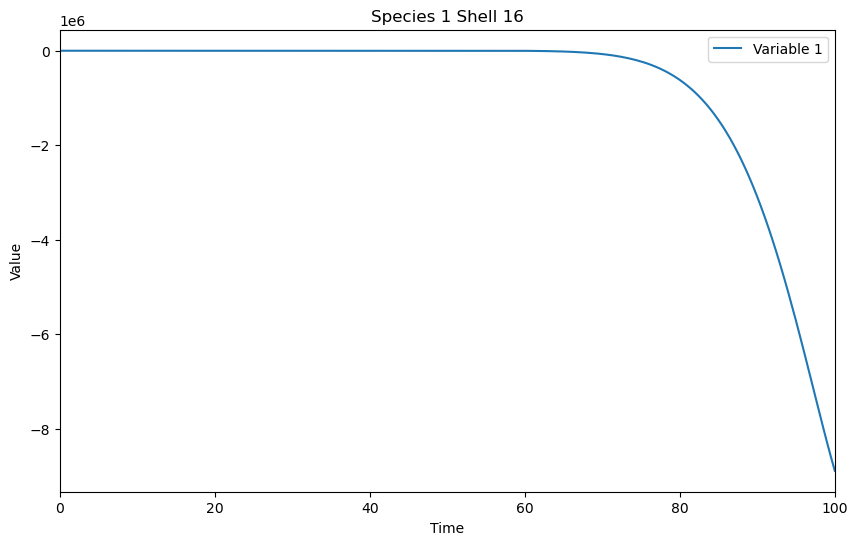

In [122]:
plt.figure(figsize=(10, 6))

plt.plot(output.t, output.y[30], label='Variable 1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Species 1 Shell 16')
plt.xlim(0,100)
plt.legend()
plt.show()

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming scenario_properties.scen_times defines the time range for plotting
start_time, end_time = scenario_properties.scen_times[0], scenario_properties.scen_times[-1]
time_points = np.linspace(start_time, end_time, 100)  # Adjust the number of points as necessary

# Filter out None values from the list of interpolated functions
interpolated_functions = [f for f in full_lambda_flattened if f is not None]

# Plot each interpolated function
plt.figure(figsize=(10, 6))
for func in interpolated_functions:
    # Evaluate the function at each point in time_points
    values = func(time_points)
    
    # Plot the result
    plt.plot(time_points, values)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Interpolated Functions Over Time')
plt.legend([f'Func {i}' for i, _ in enumerate(interpolated_functions)], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: 'numpy.ndarray' object is not callable

<Figure size 1000x600 with 0 Axes>

In [ ]:
interpolated_values = [np.interp(scenario_properties.scen_times, times, fl) if fl is not None else None for fl in full_lambda_flattened]

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
# Assuming times, full_lambda, and equations are defined

# Pre-compute interpolated values for each full_lambda entry
@jit(nopython=True)
def population_shell(t, N, interpolated_values, equations):
    dN_dt = np.zeros_like(N)
    # Find the index in scen_times closest to t
    idx = np.searchsorted(scenario_properties.scen_times, t, side='right') - 1
    
    for i in range(len(N)):
        dN_dt[i] = equations[i](*N)
        if interpolated_values[i] is not None:
            # Use pre-computed value
            increase = interpolated_values[i][idx]
            dN_dt[i] += increase
    
    return dN_dt

# Solve the ODE with pre-computed interpolated values
output = solve_ivp(population_shell, [scenario_properties.scen_times[0], scenario_properties.scen_times[-1]], x0_flattened, args=(interpolated_values, equations), t_eval=scenario_properties.scen_times, method='RK45')


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'scenario_properties':[0m [1m[1mCannot determine Numba type of <class 'utils.simulation.scen_properties.ScenarioProperties'>[0m
[1m
File "..\..\..\..\TEMP\ipykernel_16540\659704441.py", line 10:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m 

This error may have been caused by the following argument(s):
- argument 3: Cannot type list element type <class 'function'>
